# Determine analog voltage offset of SO2 analyzer

### Teledyne T100U, ser no. 203

> Patrick O'Keeffe <pokeeffe@wsu.edu>  
> Laboratory for Atmospheric Research  
> Washington State University

*TL;DR There is essentially no voltage offset present on the ADC.*

## Data Set #2 (`20171215`)

Second data set collected under same conditions as last set, but with logger clock corrected and data recording intervals modified to match the SO2 analyzer (1-min averaging). *(Analog voltage measurement continued to use offset value of 0.0ppb)*

### Setup & Import

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt # use prettier instant plot styling
plt.style.use('ggplot')

from pylab import rcParams # increase instant plot size
rcParams['figure.figsize'] = 16, 6

In [4]:
def read_TOA5(fpath, **kwargs):
    """Import TOA5-formatted data file"""
    df = pd.read_csv(fpath,
                     index_col=0, parse_dates=True,
                     # don't allow falling back to string-index
                     date_parser=lambda ts: pd.to_datetime(ts, errors='coerce',
                                                    format='%Y-%m-%d %H:%M:%S'),
                     header=1, skiprows=[2,3],
                     na_values=['NAN', 7999, -7999],
                     *kwargs)

    if df.index.has_duplicates:
        df = df.groupby(level=0).median()
    if not df.index.is_monotonic_increasing:
        df = df.sort_index()
    if not df.index.inferred_freq:
        df = df.resample(pd.infer_freq(df.index[:10])).first()
    
    # shift timestamp from end-of-period to start-of-period
    df = df.tshift(-1, df.index.inferred_freq)
    
    return df.drop(['RECORD'], axis=1, errors='ignore')

In [5]:
def read_APICOM_csv(filepath, col_names):
    df =  pd.read_csv(filepath,
                      header=0, # names 1st row
                      names=col_names, # make user rename them
                      index_col=0, # timestamps 1st col
                      parse_dates=True, # US format (MM/DD/YYYY)
                      skipinitialspace=True) # has spaces and commas
    
    df = df.resample('T').first() # move timestamp to start of minute
    df = df.tshift(-1, freq='T') # relabel as start-of-period timestamp
    if len(df.index.get_duplicates()):
        df = df.groupby(level=0).first()
    return df

In [6]:
analog = read_TOA5('CR6Series_stats.dat')
analog

,t100u_so2_Avg,t100u_so2_Std,m405_NO2_Avg,m405_NO2_Std,m405_NO_Avg,m405_NO_Std,m405_NOx_Avg,m405_NOx_Std,m405_NO2_zero_Avg,m405_NO2_zero_Std,...,li840a_pwr_src,flush_massFlow_Avg,flush_massFlow_Std,flush_tmpr_Avg,flush_press_Avg,flush_volFlow_Avg,flush_volFlow_Std,flush_delay_Avg,flush_delay_Std,flush_Re_Avg
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-12-14 22:27:00,0.539091,0.066524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.17,15.24,1.672,23.50,86.10,18.10,2.047,NaN,NaN,3281.944
2017-12-14 22:28:00,0.528792,0.067222,-35.34,4.320,5.320,3.360,-30.04,0.920,0.0,0.0,...,17.16,15.16,1.752,23.54,86.00,18.00,2.137,NaN,NaN,3262.833
2017-12-14 22:29:00,0.527769,0.076829,-26.96,0.494,0.008,2.678,-27.03,2.225,0.0,0.0,...,17.16,15.00,1.689,23.58,86.00,17.82,2.054,NaN,NaN,3228.500
2017-12-14 22:30:00,0.531175,0.066584,-29.42,2.913,5.914,1.559,-23.49,1.313,0.0,0.0,...,17.16,15.14,1.752,23.58,86.00,17.98,2.139,NaN,NaN,3257.500
2017-12-14 22:31:00,0.525179,0.076011,-35.06,0.120,7.500,2.800,-27.48,2.960,0.0,0.0,...,17.17,15.35,1.986,24.61,84.60,60.04,322.400,NaN,NaN,3291.667
2017-12-14 22:32:00,0.515579,0.071148,-34.06,2.348,1.250,1.236,-32.81,1.112,0.0,0.0,...,17.16,15.29,2.040,24.59,84.60,51.66,258.500,NaN,NaN,3280.667
2017-12-14 22:33:00,0.526908,0.071325,-30.24,1.231,-0.971,0.246,-31.21,0.985,0.0,0.0,...,17.16,15.20,1.613,23.55,86.00,18.05,1.968,NaN,NaN,3271.607
2017-12-14 22:34:00,0.530023,0.068060,-32.14,0.920,0.040,1.080,-32.10,2.000,0.0,0.0,...,17.16,15.46,1.914,24.60,84.60,58.45,309.100,NaN,NaN,3317.000
2017-12-14 22:35:00,0.526891,0.068662,-29.97,0.618,2.070,0.247,-27.88,0.412,0.0,0.0,...,17.15,15.19,1.668,23.55,86.00,18.04,2.034,NaN,NaN,3269.000


In [8]:
digital = read_APICOM_csv('SO2-203 -1MIND-CONC1-20171215-1.csv', ['so2_Avg', 'so2_Stabil_Avg'])

In [9]:
lr = pd.DataFrame([analog.t100u_so2_Avg, digital.so2_Avg[analog.index[0]:analog.index[-1]]]).T

lr.dropna(inplace=True)

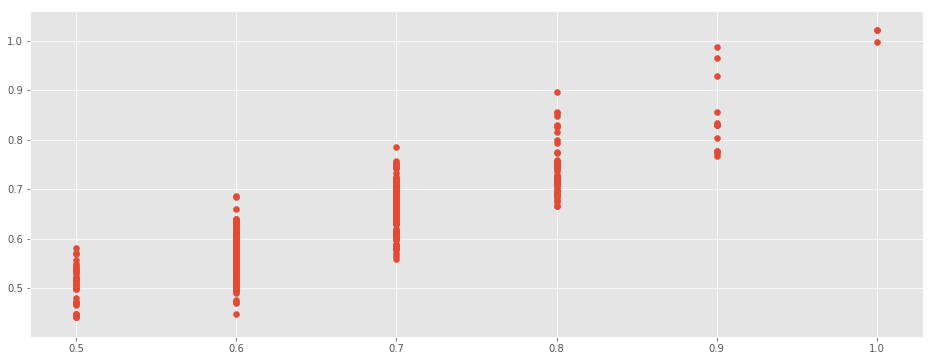

In [10]:
plt.scatter(lr.so2_Avg, lr.t100u_so2_Avg)

In [11]:
from scipy.stats import linregress
linregress(lr.so2_Avg, lr.t100u_so2_Avg)

LinregressResult(slope=0.88815122650930189, intercept=0.034679206816387365, rvalue=0.8753486277292768, pvalue=2.1739224035594854e-248, stderr=0.017564997923214115)

## Final Results 

With an improved data set, it is more clear that the ADC effectively has no offset/voltage bias.